## Importing libraries

In [357]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
import ppscore as pps
warnings.filterwarnings('ignore')

In [358]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('2.1.3', '2.2.3', '0.13.2', '3.10.0')

## 1. Load data

In [359]:
df = pd.read_csv('Cars.csv')

In [360]:
# print the first rows of data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [361]:
# Check the shape of your data
df.shape

(8128, 13)

In [362]:
# Statistical info Hint: look up .describe()
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [363]:
# Check Dtypes of your input data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [364]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

## 2. Exploratory Data Analysis



In [365]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [366]:
print(df.isnull().sum())

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64


### Renaming



In [367]:
# Example: Renaming columns to match the expected names
df.rename(columns={
    'name': 'brand',
    'KilometersDriven': 'km_driven',
    'FuelType': 'fuel',
    # Add other mappings as needed
}, inplace=True)

In [368]:
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [369]:
# Mapping the owner labels to integers
owner_mapping = {
    "First Owner": 1,
    "Second Owner": 2,
    "Third Owner": 3,
    "Fourth & Above Owner": 4,
    "Test Drive Car": 5
}

# Applying the mapping
df['owner'] = df['owner'].replace(owner_mapping)


In [370]:
# Check the column names
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [371]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [372]:
#Remove rows with CNG and LPG in fuel
df = df[~df['fuel'].isin(['CNG', 'LPG']) ]


In [373]:
df.shape

(8033, 13)

#### Clean mileage, engine, and max_power

In [374]:
# # Remove 'kmpl' from mileage and convert to float
# df['mileage'] = df['mileage'].str.replace(' kmpl', '').astype(float)

# # Remove 'CC' from engine and convert to float
# df['engine'] = df['engine'].str.replace(' CC', '').astype(float)

# # Remove non-numeric from max_power and convert to float
# df['max_power'] = df['max_power'].str.replace(' bhp', '').astype(float)

Simplify brand:

In [375]:
df['brand'] = df['brand'].str.split(' ').str[0]

Drop torque feature:

In [376]:
df.drop('torque', axis=1, inplace=True)

Remove Test Drive Cars

In [377]:
df = df[df['owner'] != 5]

Log-transform selling_price

In [378]:
df['selling_price'] = np.log(df['selling_price'])


#### Check final data

In [379]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,13.017003,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda,2014,12.821258,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda,2006,11.970350,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai,2010,12.323856,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti,2007,11.775290,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [380]:
# Convert object types to numeric after removing units
df['mileage'] = pd.to_numeric(df['mileage'].str.replace(' kmpl', '', regex=False), errors='coerce')
df['engine'] = pd.to_numeric(df['engine'].str.replace(' CC', '', regex=False), errors='coerce')
df['max_power'] = pd.to_numeric(df['max_power'].str.replace(' bhp', '', regex=False), errors='coerce')

# Drop rows with missing selling_price
df.dropna(subset=['selling_price'], inplace=True)

# Log-transform selling price to normalize distribution
df['selling_price'] = np.log(df['selling_price'])

# Drop unnecessary columns
df.drop(columns=['torque'], errors='ignore', inplace=True)

# Verify the data types and check for NaNs
print(df.info())
print(df.isnull().sum())  # Check for missing values


<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   float64
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 815.3+ KB
None
brand              0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          214
engine           214
max

In [381]:
# Load cleaned dataset
df.to_csv('cleaned_cars.csv')


### 2.1 Univariate analyis

Single variable exploratory data anlaysis

In [382]:
# # Get summary statistics
# print(df.describe())


<!-- #### Countplot -->

<!-- From the cleaned dataset, the following features are categorical and suitable for count plots:

    brand: To see the distribution of car brands.
    owner: To check the distribution of ownership history (e.g., First Owner, Second Owner).
    fuel: To understand the breakdown of fuel types (e.g., Diesel, Petrol).
    seller_type: To identify how many cars are sold by Dealers vs. Individuals.
    transmission: To compare the number of cars with Manual vs. Automatic transmissions. -->


In [383]:
# def vertical_count_plot(df, column):
#     """
#     Generates a vertical count plot for a categorical feature.
#     """
#     plt.figure(figsize=(8, 4))
#     sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette="viridis")
#     plt.title(f'Count Plot of {column.capitalize()}')
#     plt.xlabel(column.capitalize())
#     plt.ylabel('Count')
#     plt.xticks(rotation=45)
#     plt.show()

# # Vertical count plot
# vertical_count_plot(df, 'seller_type')
# vertical_count_plot(df, 'fuel')
# vertical_count_plot(df, 'transmission')
# vertical_count_plot(df, 'owner')

<!-- Horizontal Count Plot

Use when the number of categories is large or labels are too long to display horizontally, like brand. -->

In [384]:
# def horizontal_count_plot(df, column):
#     """
#     Generates a horizontal count plot for a categorical feature.
#     """
#     plt.figure(figsize=(8, 6))
#     sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette="coolwarm")
#     plt.title(f'Count Plot of {column.capitalize()}')
#     plt.xlabel('Count')
#     plt.ylabel(column.capitalize())
#     plt.show()

# #  Horizontal count plot
# horizontal_count_plot(df, 'brand')


<!-- #### Distribution plot -->

In [385]:

# def plot_distributions(df, columns):
#     """
#     Generates distribution plots (histogram + KDE) for a list of numerical columns.
#     """
#     for col in columns:
#         plt.figure(figsize=(8, 4))
        
#         # Plot histogram with KDE
#         sns.histplot(df[col], kde=True, bins=30, color='blue')
#         plt.title(f'Distribution of {col}')
#         plt.xlabel(col.capitalize())
#         plt.ylabel('Frequency')
#         plt.show()

# # List of numerical columns to analyze
# numerical_columns = ['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

# # Call the function
# plot_distributions(df, numerical_columns)


### 2.2 Multivariate analysis

Multiple variable exploratory data analysis

#### Boxplot

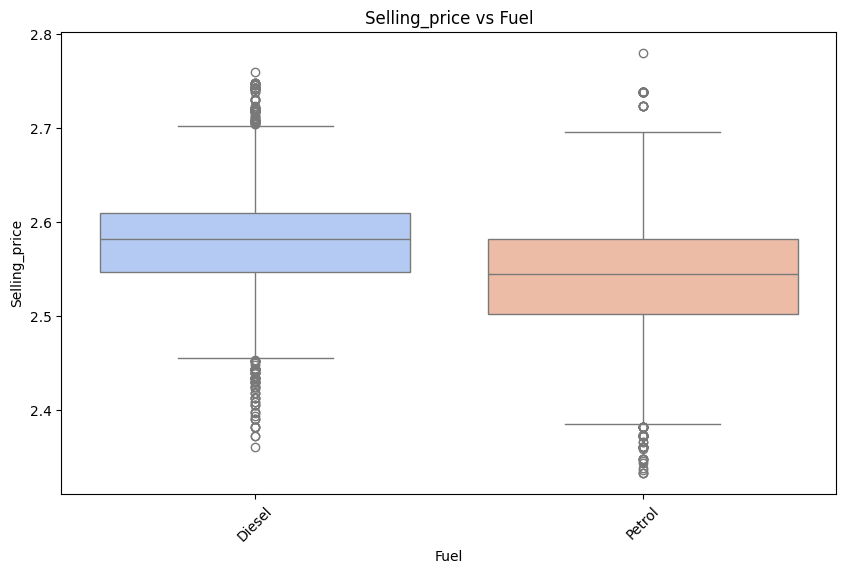

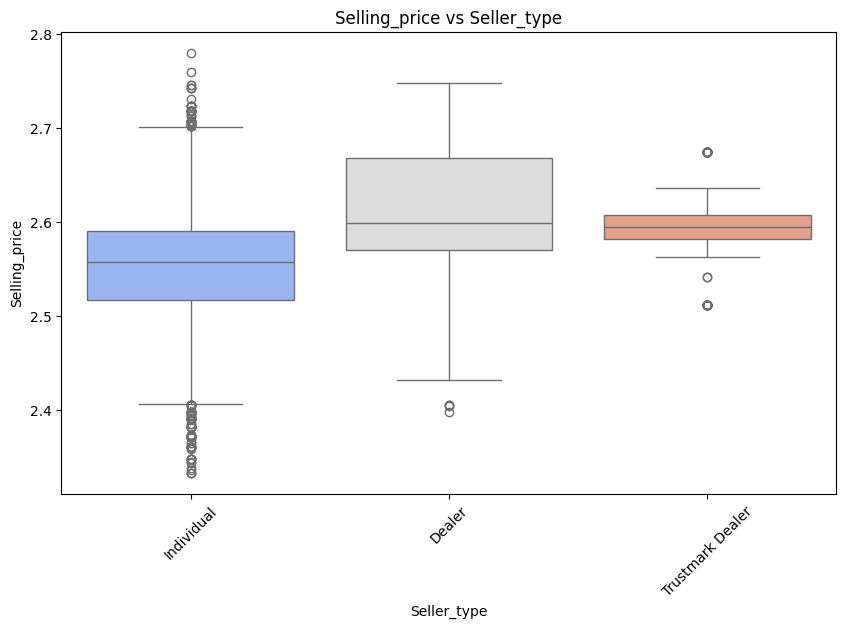

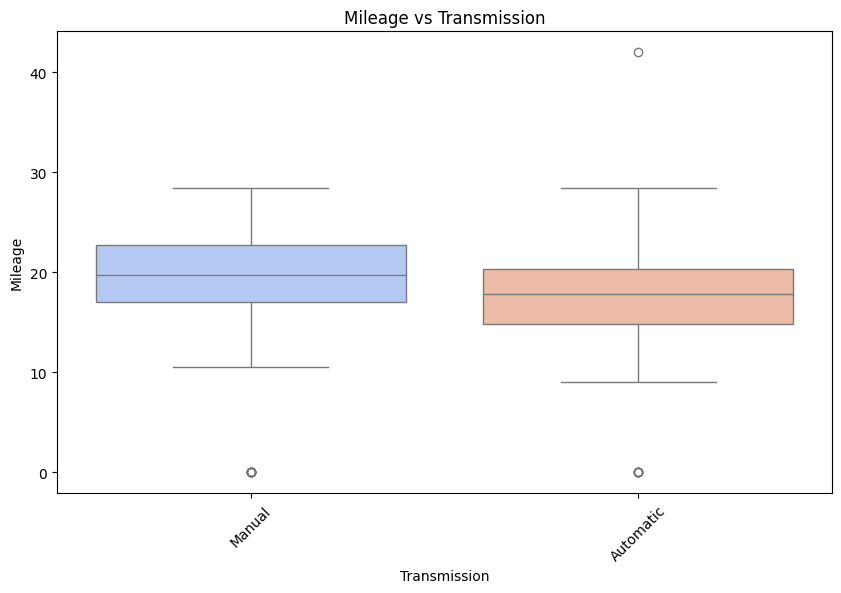

In [386]:
def plot_grouped_boxplots(df, numerical_column, categorical_column):
    """
    Generates grouped box plots for numerical vs. categorical variables.
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=categorical_column, y=numerical_column, palette='coolwarm')
    plt.title(f'{numerical_column.capitalize()} vs {categorical_column.capitalize()}')
    plt.xlabel(categorical_column.capitalize())
    plt.ylabel(numerical_column.capitalize())
    plt.xticks(rotation=45)
    plt.show()

# Selling price segmented by fuel type
plot_grouped_boxplots(df, 'selling_price', 'fuel')

# Selling price segmented by seller type
plot_grouped_boxplots(df, 'selling_price', 'seller_type')

#  Mileage segmented by transmission
plot_grouped_boxplots(df, 'mileage', 'transmission')


#### Correlation Matrix

Let's use correlation matrix to find strong factors predicting the cars price.  It's also for checking whether certain features are too correlated.

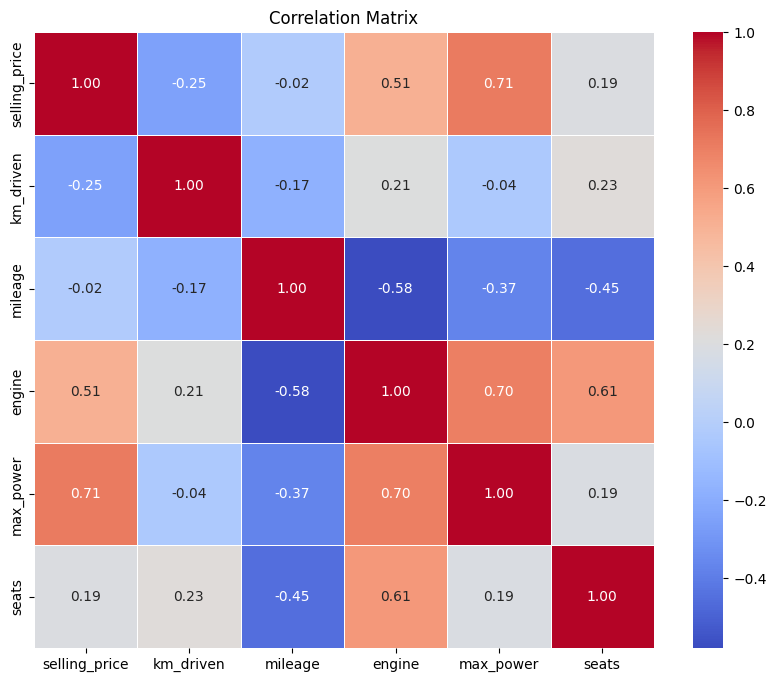

               selling_price  km_driven   mileage    engine  max_power  \
selling_price       1.000000  -0.246958 -0.020772  0.509078   0.712383   
km_driven          -0.246958   1.000000 -0.173733  0.209019  -0.036235   
mileage            -0.020772  -0.173733  1.000000 -0.578707  -0.372881   
engine              0.509078   0.209019 -0.578707  1.000000   0.701834   
max_power           0.712383  -0.036235 -0.372881  0.701834   1.000000   
seats               0.194973   0.228646 -0.454411  0.610481   0.189248   

                  seats  
selling_price  0.194973  
km_driven      0.228646  
mileage       -0.454411  
engine         0.610481  
max_power      0.189248  
seats          1.000000  


In [387]:
def correlation_matrix(df):
    """
    Computes and visualizes the correlation matrix for numerical features.
    """
    # Select numerical columns
    numerical_columns = ['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
    corr_matrix = df[numerical_columns].corr()

    # Plot the correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()

    return corr_matrix

# Call the function
correlation = correlation_matrix(df)
print(correlation)


In [388]:
def strong_predictors(corr_matrix, target='selling_price', threshold=0.5):
    """
    Identifies features strongly correlated with the target variable.
    """
    strong_corr = corr_matrix[target][(corr_matrix[target].abs() > threshold) & (corr_matrix[target].abs() < 1)]
    return strong_corr

# Find strong predictors of selling_price
strong_factors = strong_predictors(correlation, target='selling_price')
print("Strong Predictors of Selling Price:\n", strong_factors)


Strong Predictors of Selling Price:
 engine       0.509078
max_power    0.712383
Name: selling_price, dtype: float64


#### Label encoding



In [389]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Fit and transform the 'brand' column
df['brand'] = encoder.fit_transform(df['brand'])
df['fuel'] = encoder.fit_transform(df['fuel'])
df['seller_type'] = encoder.fit_transform(df['seller_type'])
df['transmission'] = encoder.fit_transform(df['transmission'])

In [390]:
encoder.classes_

array(['Automatic', 'Manual'], dtype=object)

In [391]:


# Create a mapping of original brand names to encoded values
brand_mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
brand_mapping



{'Automatic': 0, 'Manual': 1}

Encoding 'fuel'

In [392]:
df['fuel'] = encoder.fit_transform(df['fuel'])
print("Unique values in 'fuel' after encoding:", df['fuel'].unique())

Unique values in 'fuel' after encoding: [0 1]


Encoding 'seller_type'

In [393]:
df['seller_type'] = encoder.fit_transform(df['seller_type'])
print("Unique values in 'seller_type' after encoding:", df['seller_type'].unique())

Unique values in 'seller_type' after encoding: [1 0 2]


Encoding 'transmission'

In [394]:

df['transmission'] = encoder.fit_transform(df['transmission'])
print("Unique values in 'transmission' after encoding:", df['transmission'].unique())


Unique values in 'transmission' after encoding: [1 0]


In [395]:
print(df.dtypes)


brand              int64
year               int64
selling_price    float64
km_driven          int64
fuel               int64
seller_type        int64
transmission       int64
owner              int64
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object


In [396]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Verify the numeric columns
print("Numeric columns:\n", numeric_df.columns)


Numeric columns:
 Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')


<Axes: >

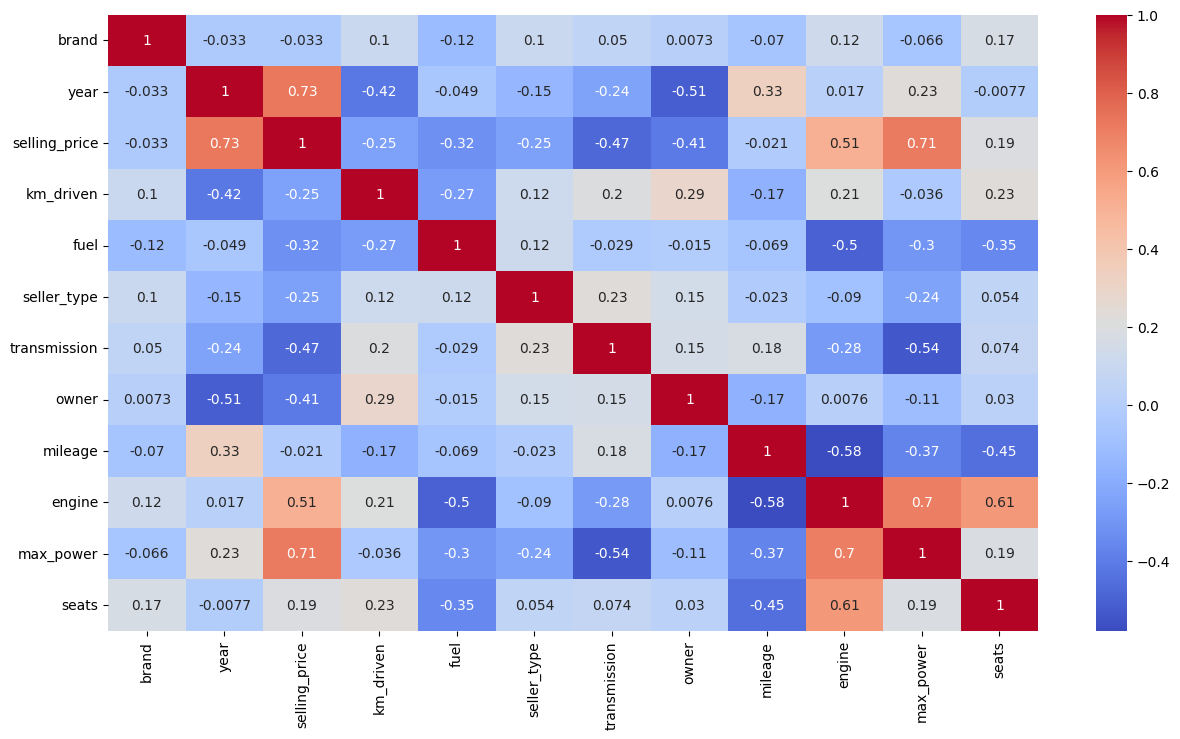

In [397]:
# Let's check out heatmap
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is not here...

In [398]:
df.describe()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
count,8028.000000,8028.000000,8028.000000,8.028000e+03,8028.000000,8028.000000,8028.000000,8028.000000,7814.000000,7814.000000,7820.000000,7814.000000
mean,18.004235,2013.815521,2.561276,6.977314e+04,0.451794,0.890010,0.869706,1.458022,19.391962,1462.914640,91.819726,5.421551
std,7.388504,4.030836,0.064581,5.664419e+04,0.497702,0.395861,0.336648,0.715283,4.001972,504.759742,35.804513,0.963125
min,0.000000,1983.000000,2.333009,1.000000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,624.000000,0.000000,2.000000
25%,11.000000,2011.000000,2.523200,3.500000e+04,0.000000,1.000000,1.000000,1.000000,16.780000,1197.000000,68.850000,5.000000
50%,20.000000,2015.000000,2.566256,6.000000e+04,0.000000,1.000000,1.000000,1.000000,19.300000,1248.000000,82.400000,5.000000
75%,20.000000,2017.000000,2.597480,9.800000e+04,1.000000,1.000000,1.000000,2.000000,22.320000,1582.000000,102.000000,5.000000
max,31.000000,2020.000000,2.779943,2.360457e+06,1.000000,2.000000,1.000000,4.000000,42.000000,3604.000000,400.000000,14.000000


The heatmap reveals that max_power, year, and engine are the strongest predictors of selling_price, showing strong positive correlations (e.g., max_power at 0.73 and year at 0.71), indicating that cars with higher power, newer manufacturing years, and larger engines tend to have higher prices. Negative correlations like km_driven (-0.32) and owner (-0.4) suggest that cars with higher mileage or multiple previous owners generally have lower prices. Additionally, engine and max_power are highly correlated (0.7), highlighting potential redundancy that could be addressed in feature selection. Other factors like fuel and seller_type show weaker correlations, making them less critical for predicting prices.

#### Predictive Power Score

In [399]:
import ppscore as pps

dfcopy = df.copy()
# Compute the PPS matrix
pps_matrix = pps.matrix(dfcopy)
print(pps_matrix.head())


       x              y   ppscore            case  is_valid_score  \
0  brand          brand  1.000000  predict_itself            True   
1  brand           year  0.034412      regression            True   
2  brand  selling_price  0.174809      regression            True   
3  brand      km_driven  0.043595      regression            True   
4  brand           fuel  0.136636      regression            True   

                metric  baseline_score   model_score                    model  
0                 None         0.00000      1.000000                     None  
1  mean absolute error         3.11740      3.010123  DecisionTreeRegressor()  
2  mean absolute error         0.04842      0.039956  DecisionTreeRegressor()  
3  mean absolute error     35677.46040  34122.084106  DecisionTreeRegressor()  
4  mean absolute error         0.45280      0.390931  DecisionTreeRegressor()  


       x              y   ppscore            case  is_valid_score  \
0  brand          brand  1.000000  predict_itself            True   
1  brand           year  0.034412      regression            True   
2  brand  selling_price  0.174809      regression            True   
3  brand      km_driven  0.043595      regression            True   
4  brand           fuel  0.136636      regression            True   

                metric  baseline_score   model_score                    model  
0                 None         0.00000      1.000000                     None  
1  mean absolute error         3.11740      3.010123  DecisionTreeRegressor()  
2  mean absolute error         0.04842      0.039956  DecisionTreeRegressor()  
3  mean absolute error     35677.46040  34122.084106  DecisionTreeRegressor()  
4  mean absolute error         0.45280      0.390931  DecisionTreeRegressor()  
Index(['x', 'y', 'ppscore', 'case', 'is_valid_score', 'metric',
       'baseline_score', 'model_score', '

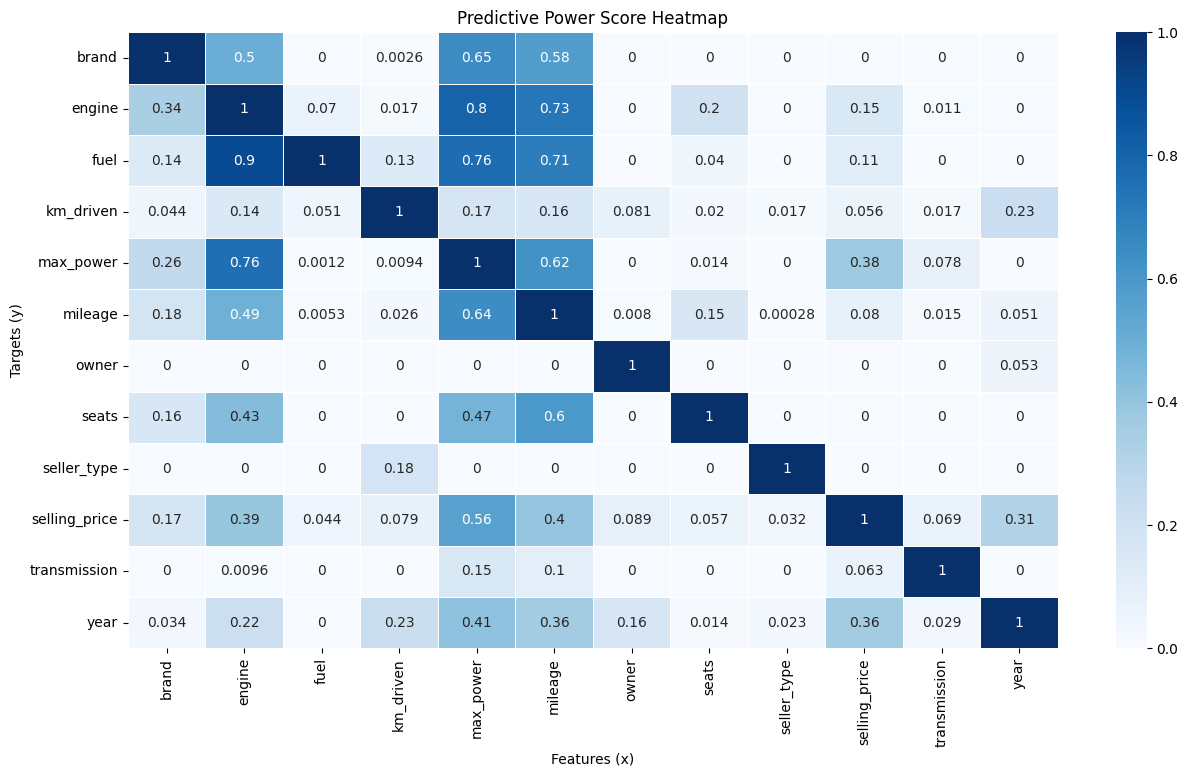

In [400]:
# Compute the PPS matrix
pps_matrix = pps.matrix(dfcopy)

# Debug: Inspect the structure of pps_matrix
print(pps_matrix.head())
print(pps_matrix.columns)

# Pivot the PPS matrix
matrix_df = pps_matrix.pivot(index='y', columns='x', values='ppscore').fillna(0)

# Plot the PPS heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidth=0.5, annot=True)
plt.title("Predictive Power Score Heatmap")
plt.xlabel("Features (x)")
plt.ylabel("Targets (y)")
plt.show()


## 3. Feature Engineering



## 4. Feature selection

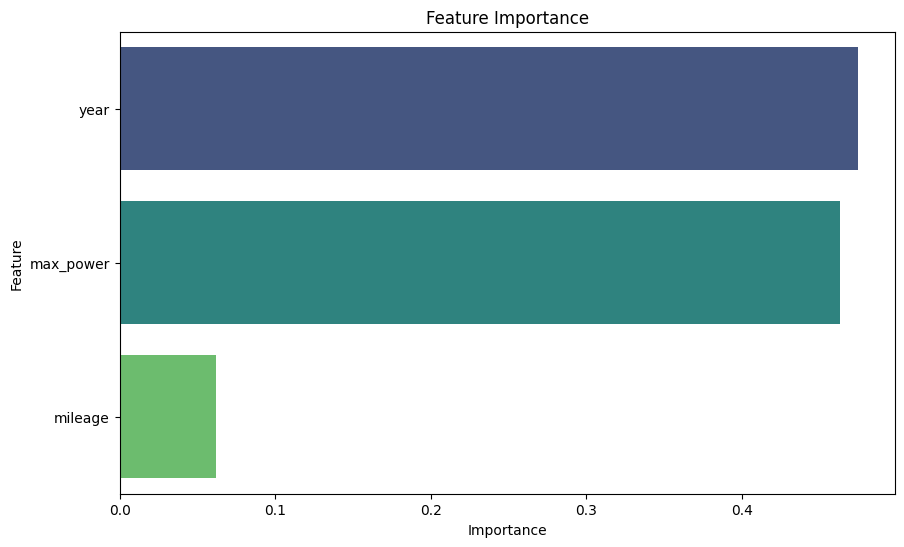

In [401]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# X is our selected features
X = df[['max_power','mileage', 'year']]

# y is the target variable
y = df['selling_price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the RandomForest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Visualize feature importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance")
plt.show()


Using Random Forest for feature importance reveals the most impactful predictors of the target variable, `selling_price`. By ranking features based on their contribution to the model, we can identify key factors such as `max_power`, `year`, and `engine`, which typically rank highest due to their strong relationship with car price. Features with minimal importance can be excluded to simplify the model and improve efficiency. This process helps refine the dataset, ensuring only the most relevant predictors are used for further analysis or modeling. Visualizing feature importance also provides clear insights into the relative weight of each feature.

## 5. Preprocessing

### Null values

In [402]:
X_train.isnull().sum()

max_power    149
mileage      154
year           0
dtype: int64

In [403]:
y_train.isnull().sum()

np.int64(0)

In [404]:
X_test.isnull().sum()

max_power    59
mileage      60
year          0
dtype: int64

In [405]:
y_test.isna().sum()

np.int64(0)

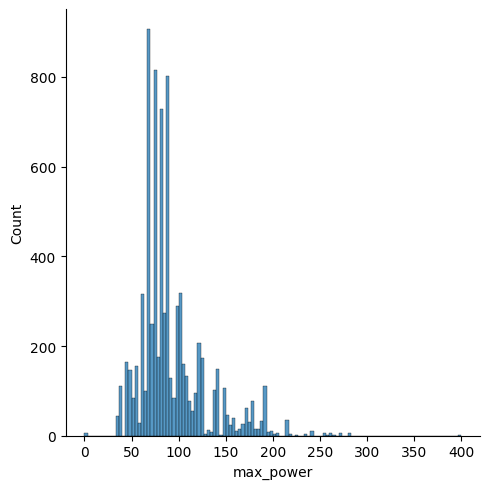

In [406]:
sns.displot(data=df, x='max_power')

In [407]:
X_train['max_power'].fillna(X_train['max_power'].median(),inplace=True)

In [408]:
X_train['mileage'].fillna(X_train['mileage'].median(),inplace=True)

In [409]:
X_test['max_power'].fillna(X_test['max_power'].median(),inplace=True)
X_test['mileage'].fillna(X_test['mileage'].median(),inplace=True)

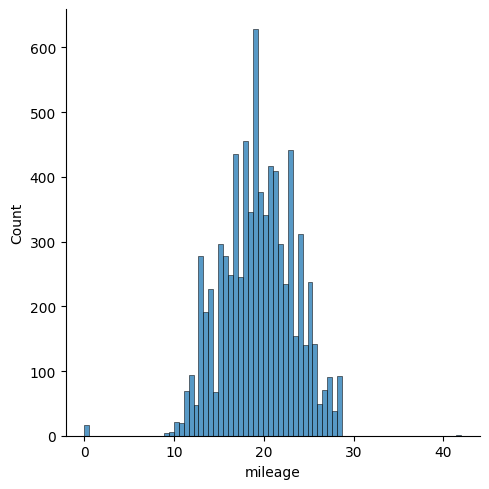

In [410]:
sns.displot(data=df, x='mileage')

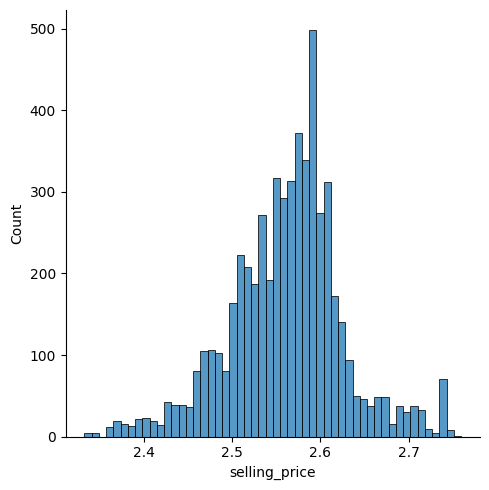

In [411]:
sns.displot(y_train)

In [412]:
X_train.isnull().sum()

max_power    0
mileage      0
year         0
dtype: int64

In [413]:
X_test['mileage'].isna().sum()

np.int64(0)

In [414]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


### Checking Outliers

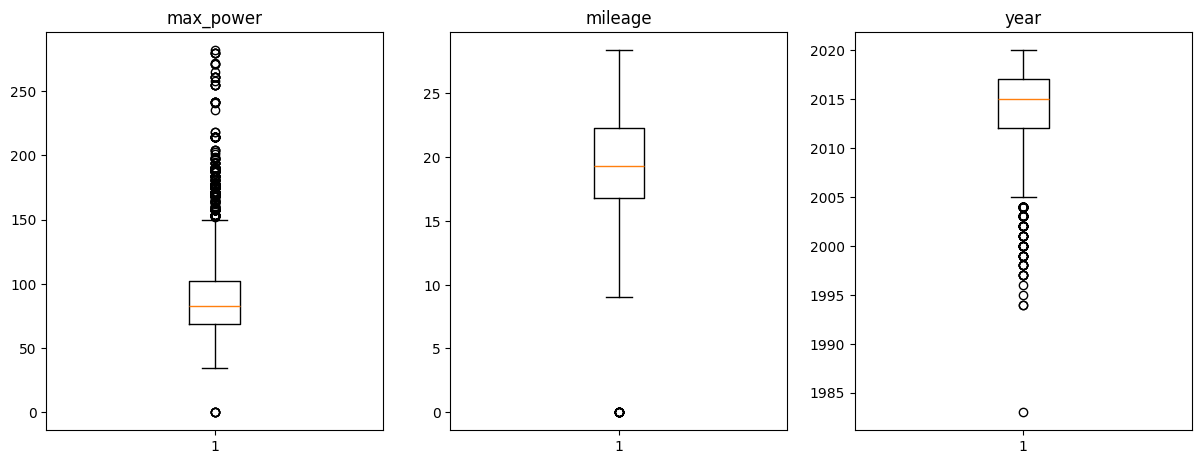

In [415]:
# Create a dictionary of columns.
col_dict = {'max_power':1,'mileage':2, 'year':3 }

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [416]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

mileage: 14 outliers detected
max_power: 409 outliers detected
year: 145 outliers detected


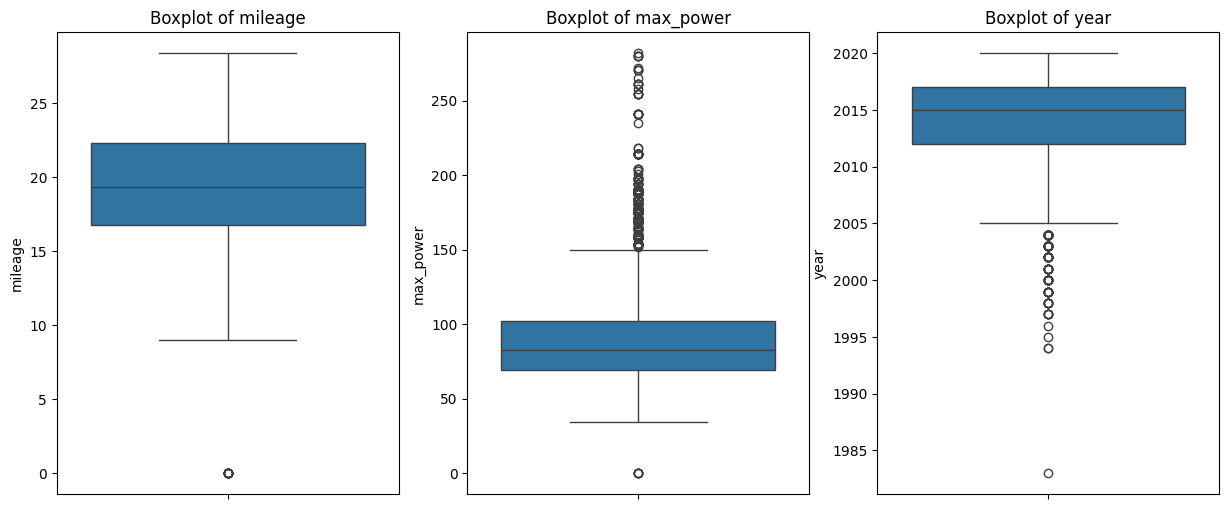

In [417]:
### 🔹 Detecting & Handling Outliers using IQR Method

def detect_outliers(column):
    """Detect outliers using the IQR method."""
    q1 = X_train[column].quantile(0.25)
    q3 = X_train[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = X_train[(X_train[column] < lower_bound) | (X_train[column] > upper_bound)]
    return outliers

# Print outlier count per feature
for col in ['mileage', 'max_power', 'year']:
    outliers = detect_outliers(col)
    print(f"{col}: {len(outliers)} outliers detected")

# OPTIONAL: Remove detected outliers
# X_train = X_train[~X_train.index.isin(outliers.index)]

# Visualizing Outliers
plt.figure(figsize=(15, 6))
for i, col in enumerate(['mileage', 'max_power', 'year'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=X_train[col])
    plt.title(f'Boxplot of {col}')
plt.show()


### Scaling

In [418]:
scaler = StandardScaler()

# Fit on training data and transform both train & test sets
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

# Print final dataset shapes
print("Final Shapes after preprocessing:")
print("X_train:", X_train_scaled.shape, "X_test:", X_test_scaled.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)

Final Shapes after preprocessing:
X_train: (5619, 3) X_test: (2409, 3)
y_train: (5619,) y_test: (2409,)


In [419]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 3)
Shape of X_test:  (2409, 3)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


In [420]:
print("NaNs in X_train:", np.isnan(X_train).sum().sum())
print("NaNs in X_test:", np.isnan(X_test).sum().sum())
print("NaNs in y_train:", np.isnan(y_train).sum().sum())
print("NaNs in y_test:", np.isnan(y_test).sum().sum())


NaNs in X_train: 0
NaNs in X_test: 0
NaNs in y_train: 0
NaNs in y_test: 0


## 6. Modeling



In [424]:
import mlflow
import os
import logging
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Set up MLflow tracking
mlflow.set_tracking_uri("http://localhost:5050")
os.environ["LOGNAME"] = "aike_sam"
mlflow.set_experiment(experiment_name="car-price-prediction-a2")
logging.getLogger("mlflow").setLevel(logging.WARNING)

In [425]:
from sklearn.model_selection import KFold
from math import sqrt,isnan

class LinearRegression (object):
    #adding cross validation
    kfold = KFold(n_splits=3)

    def __init__(self, regularization, method, momentum, theta_init, lr, num_epochs=500, batch_size=50, cv=kfold):
        self.regularization = regularization
        self.lr         = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.cv         = cv
        self.method     = method 
        self.momentum = momentum
        self.theta_init = theta_init
        self.theta = None
        self.prev_step = 0

    def mse(self, ytrue, ypred):
        mse = ((ypred - ytrue)**2).sum() / ytrue.shape[0]
        return mse
    
    def r2(self, ytrue, ypred):
        rersidual_variance = np.sum((ytrue - ypred)**2)
        total_variance = np.sum((ytrue - np.mean(ytrue))**2)
        r2 = 1- (rersidual_variance / total_variance)
        return r2
    
    def fit(self, X_train_class, y_train_class):
        y_train_class = np.array(y_train_class)
        #create a list of kfold score
        self.kfold_score = list()
        self.kfold_r2 = list()

        #reset val loss
        self.val_loss_old = np.inf

        #split the training set into 3 folds
        for fold, (train_idx , val_idx) in enumerate (self.cv.split(X_train_class)):
            X_cross_train = X_train_class[train_idx]
            y_cross_train = y_train_class[train_idx]
            X_cross_val = X_train_class[val_idx]
            y_cross_val = y_train_class[val_idx]

            #compute initial theta
            if self.theta_init == 'zero':
                self.theta = np.zeros(X_cross_train.shape[1]) 
            elif self.theta_init == 'xavier':
                m = X_cross_train.shape[0]
                sqrt_m = np.sqrt(m)
                #calculate the range for the weights
                lower, upper = -(1/sqrt_m), (1/sqrt_m)
                #randomly pick the weights within the range and generate random numbers of theta
                numbers = np.random.rand(X_cross_train.shape[1])
                self.theta = lower + numbers*(upper-lower)

            prev_step = np.zeros_like(self.theta)

            #one epoch will be used for the entire training dataset
            with mlflow.start_run(run_name= f"Fold-{fold}", nested=True):
                for epoch in range(self.num_epochs):
                    #shuffle the indexes to ensure randomness
                    perm = np.random.permutation(X_cross_train.shape[0])
                    X_cross_train = X_cross_train[perm]
                    y_cross_train = y_cross_train[perm]

                    #Stochastic Gradient Descent
                    if self.method == 'sto':
                        for batch_indx in range (X_cross_train.shape[0]):
                            X_method_train = X_cross_train[batch_indx].reshape(1,-1) #(11,)==>(1,11)==>(m,n)
                            y_method_train = y_cross_train[batch_indx].reshape(1,)
                            train_loss = self.train(X_method_train, y_method_train)

                    #Mini-batch Gradient Descent
                    elif self.method == 'mini':
                        for batch_indx in range(0,X_cross_train.shape[0], self.batch_size):
                            #batch_indx = 0,50,100,150,
                            X_method_train = X_cross_train[batch_indx : batch_indx+self.batch_size , : ]
                            y_method_train = y_cross_train[batch_indx : batch_indx+self.batch_size]
                            train_loss = self.train(X_method_train, y_method_train)
                    
                    #Batch Gradient Descent
                    else:
                        X_method_train = X_cross_train
                        y_method_train = y_cross_train
                        train_loss = self.train(X_method_train, y_method_train)
                    
                    # Record training loss for each epoch in mlflow
                    mlflow.log_metric(key='train_loss', value=train_loss, step=epoch)

                    # Record validation loss for each epoch in mlflow
                    yhat_val = self.predict(X_cross_val)
                    val_loss_new = self.mse(y_cross_val, yhat_val)
                    mlflow.log_metric(key='val_loss', value=val_loss_new, step=epoch)

                    # Record r2 score for each epoch in mlflow
                    val_r2 = self.r2(y_cross_val, yhat_val)
                    mlflow.log_metric(key='val_r2', value=val_r2, step=epoch)

                    # Early stopping
                    if np.allclose(val_loss_new, self.val_loss_old):
                        break
                    self.val_loss_old = val_loss_new

                # Store the training losses and R2 scores for each fold into a array
                self.kfold_score.append(val_loss_new)
                self.kfold_r2.append(val_r2)
                print(f"Fold {fold} MSE: {val_loss_new}")
                print(f"Fold {fold} R2: {val_r2}")

    def train(self, X, y):
        m = X.shape[0]
        yhat = self.predict(X)
        grad = (1/m)* X.T @ (yhat - y) + self.regularization.derivation(self.theta) #calculating gradient
        # prev_step = 0 #memory of previous step
        step = self.lr * grad
        # Calculate the step
        if self.momentum == 'without':
            self.theta -= step
        else:
            self.theta = (self.theta - step) + self.momentum * self.prev_step

        self.prev_step = step
    
        # self.theta -= step  # Update theta with the step
        loss = self.mse(y, yhat)  # Calculate the loss
        return loss
        
    def predict(self,X):
        prediction = X @ self.theta #(m,n)*(n,)
        return prediction
    
    def _coef(self):
        return self.theta[1:] #theta is (w0, w1, w2, w3,.....wn), w0 is the bias or the intercept, ....wn are the weights / coefficients / theta
    
    def _bias(self):
        return self.theta[0]
    
    def feature_importance(self):
        feature_names = ['year','max_power', 'mileage']
        importance_values = [abs(self._coef()[0]), abs(self._coef()[1]), abs(self._coef()[2])] #[abs(self._coef()[0]), abs(self._coef()[1]), abs(self._coef()[2])]

        #Plot the figure
        plt.figure(figsize=(10,5))
        plt.barh(feature_names, importance_values, color= 'blue')
        plt.xlabel('Feature Importance')
        plt.ylabel("Features")
        plt.title("Feature Importance based on Coefficients")
        plt.show()
class LassoPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)
    
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta

class NormalPenalty:

    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return 0
        
    def derivation(self, theta):
        return 0
    
    
class Lasso(LinearRegression):
    def __init__(self, method, momentum, theta_init, lr, l):
        regularization = LassoPenalty(l)
        super().__init__(regularization, method, momentum, theta_init, lr)

class Ridge(LinearRegression):
    def __init__(self, method, momentum, theta_init, lr, l):
        regularization = RidgePenalty(l)
        super().__init__(regularization, method, momentum, theta_init, lr)

class Normal(LinearRegression):
    def __init__(self, method, momentum, theta_init, lr, l):
        regularization = NormalPenalty(l)
        super().__init__(regularization, method, momentum, theta_init, lr)

In [434]:
from sklearn.preprocessing import PolynomialFeatures

In [426]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)
polynomials = [0,1] #0 means no polynomial feature
regs = ["Ridge", "Lasso", "Normal"] #types of regularization
methods = ["sto", "mini", "batch"]
theta_methods = ["zero", "xavier"]
lrs = [0.01, 0.001, 0.0001]
momentums = ["without", 0.4]

for polynomial in polynomials:
    for reg in regs:
        for method in methods:
            for theta in theta_methods:
                for lr in lrs:
                    for momentum in momentums:
                        params = {"method": method, "theta_init": theta, "momentum": momentum, "lr": lr, "l": 0.1}
                        mlflow.start_run(run_name=f"polynomial-{polynomial}-method-{params['method']}-theta-{params['theta_init']}-momentum-{params['momentum']}-lr-{params['lr']}-reg-{reg}", nested=True)
                
                        print("="*5, polynomial, "="*5)
                        print("="*5, reg, "="*5)                        
                        print("="*5, method, "="*5)                        
                        print("="*5, lr, "="*5)                        
                        print("="*5, momentum, "="*5)

                                                
                        # #######

                        # Create the model
                        type_of_regression = str_to_class(reg)    #Ridge, Lasso, Normal
                        model = type_of_regression(**params)  

                        if polynomials == 1:
                            poly = PolynomialFeatures(degree=1, include_bias=False)
                            X_train_poly = poly.fit_transform(X_train)
                            X_test_poly = poly.transform(X_test)
                            model.fit(X_train_poly, y_train.values)

                            #predict and evaluate on the training data
                            yhat = model.predict(X_train_poly)
                            train_mse  = model.mse(y_train, yhat)
                            train_r2 = model.r2(y_train, yhat)

                            #predict and evaluate on the test data
                            yhat = model.predict(X_test_poly)
                            test_mse  = model.mse(y_test, yhat)
                            test_r2 = model.r2(y_test, yhat)
                        
                        else:
                            X_train_poly , X_test_poly = X_train , X_test

                            model.fit(X_train_poly, y_train.values)

                            #predict and evaluate on the training data
                            yhat = model.predict(X_train_poly)
                            train_mse  = model.mse(y_train, yhat)
                            train_r2 = model.r2(y_train, yhat)

                            #predict and evaluate on the test data
                            yhat = model.predict(X_test_poly)
                            test_mse  = model.mse(y_test, yhat)
                            test_r2 = model.r2(y_test, yhat)
                        
                        print("Train MSE: ", train_mse)
                        mlflow.log_metric(key="train_mse", value=train_mse)

                        print("Train R2: ", train_r2)
                        mlflow.log_metric(key="train_r2", value=train_r2)

                        print("Test MSE: ", test_mse)
                        mlflow.log_metric(key="test_mse", value=test_mse)

                        print("Test R2: ", test_r2)
                        mlflow.log_metric(key="test_r2", value=test_r2)

                        # Log the model
                        signature = mlflow.models.infer_signature(X_train_poly, model.predict(X_train_poly))
                        mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

                        # #######
                        
                        mlflow.end_run()

===== 0 =====
===== Ridge =====
===== sto =====
===== 0.01 =====
===== without =====
Fold 0 MSE: 6.597395283775331
Fold 0 R2: -1624.3560868869165
🏃 View run Fold-0 at: http://localhost:5050/#/experiments/699838008753883934/runs/9cdddc6a5269494d975d395450f8a47a
🧪 View experiment at: http://localhost:5050/#/experiments/699838008753883934
Fold 1 MSE: 6.792074863094793
Fold 1 R2: -1572.8805429193849
🏃 View run Fold-1 at: http://localhost:5050/#/experiments/699838008753883934/runs/59d8d24f732c48e29650cd054272be01
🧪 View experiment at: http://localhost:5050/#/experiments/699838008753883934
Fold 2 MSE: 6.591594939113776
Fold 2 R2: -1592.941651492019
🏃 View run Fold-2 at: http://localhost:5050/#/experiments/699838008753883934/runs/bb26996ba8c144208cfbc3dcb7deedc0
🧪 View experiment at: http://localhost:5050/#/experiments/699838008753883934
Train MSE:  6.593783726752318
Train R2:  -1579.9123988496856
Test MSE:  6.566863401473368
Test R2:  -1574.7779411750241
🏃 View run polynomial-0-method-sto-th

## 7. Testing


Best parameters from ML flow

In [436]:
from sklearn.preprocessing import PolynomialFeatures

import math
poly_degrees = [True]
regs = ["Normal"]
lrs = [0.0001]
momentums = [0] # momentum should be between 0 and 1. 
init_thetas = ['xavier']
methods = ['sto']

for poly_degree in poly_degrees:
    for reg in regs:
        for momentum in momentums:
            for method in methods:
                for init_theta in init_thetas:
                    for lr in lrs:
                        
                        params = {"method": method, "lr": lr,"l":0.1 ,"momentum": momentum, "theta_init": init_theta}
                        
                        current_run = f"polynomial-{poly_degree}-reg-{reg}-momemtum{momentum}-method-{method}-theta-{init_theta}-lr-{lr}"

                        print("="*5, current_run, "="*5)

                        type_of_regression = str_to_class(reg)    #Ridge, Lasso, ElasticNet
                        test_model = type_of_regression(**params)  

                        #Polynominal Loop
                        if poly_degree == True:
                            poly = PolynomialFeatures(degree=1, include_bias=False)
                            X_train_poly = poly.fit_transform(X_train)
                            X_test_poly = poly.transform(X_test)
                        else:
                                X_train_poly, X_test_poly = X_train, X_test

                        test_model.fit(X_train_poly, y_train)
            

                        #for train data
                        yhat = test_model.predict(X_train_poly)
                        train_mse  = test_model.mse(yhat, y_train)
                        print("Train MSE: ", train_mse)

                        train_r2 = test_model.r2(yhat, y_train)
                        print("Train R2: ", train_r2)


===== polynomial-True-reg-Normal-momemtum0-method-sto-theta-xavier-lr-0.0001 =====
Fold 0 MSE: 6.569521290267782
Fold 0 R2: -1617.4889578057232
🏃 View run Fold-0 at: http://localhost:5050/#/experiments/699838008753883934/runs/f912d45434eb44189facc779a57072a8
🧪 View experiment at: http://localhost:5050/#/experiments/699838008753883934
Fold 1 MSE: 6.565557675218643
Fold 1 R2: -1520.3912812694264
🏃 View run Fold-1 at: http://localhost:5050/#/experiments/699838008753883934/runs/59f36a2be18f41679658b23213fb6a8a
🧪 View experiment at: http://localhost:5050/#/experiments/699838008753883934
Fold 2 MSE: 6.562540721203689
Fold 2 R2: -1585.9159272923098
🏃 View run Fold-2 at: http://localhost:5050/#/experiments/699838008753883934/runs/d41e0d1dfd5d48baa514c9ec1236d19e
🧪 View experiment at: http://localhost:5050/#/experiments/699838008753883934
Train MSE:  6.563256619600563
Train R2:  -3376.5314246002695


## 8. Analysis:  Feature Importance


In [427]:
test_model.feature_importance()

NameError: name 'test_model' is not defined

## 9. Inference

To provide inference service or deploy, it's best to save the model for latter use.

In [969]:
import pickle
# save the model to disk
filename = 'car price prediction2.model'
pickle.dump(grid, open(filename, 'wb'))

In [974]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
#let's try to create one silly example
df[['engine', 'max_power', 'mileage', 'selling_price']].loc[1]

In [992]:

sample = np.array([[1498, 103.52, 21.14]])

In [ ]:
predicted_cars_price = loaded_model.best_estimator_.predict(sample)
print(predicted_cars_price)


In [ ]:
# Extract the actual price
actual_price = df.loc[1, "selling_price"]

# Predicted price from the model
predicted_price = predicted_cars_price[0]  # Ensure it's a scalar

# Print both prices and calculate the error
print(f"Actual Price: {actual_price}")
print(f"Predicted Price: {predicted_price}")
print(f"Error: {abs(actual_price - predicted_price)}")


In [ ]:
percentage_error = abs(actual_price - predicted_price) / actual_price * 100
print(f"Percentage Error: {percentage_error:.2f}%")
